## SimpleRNN

In [1]:
from keras import models
from keras import layers
from keras.preprocessing import sequence
from keras.datasets import imdb

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
max_features = 10000
maxlen = 500

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=max_features)
print(len(x_train),'train sequences')
print(len(x_test),'test sequences')

x_train = sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = sequence.pad_sequences(x_test,maxlen=maxlen)

print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)

25000 train sequences
25000 test sequences
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [3]:
model = models.Sequential()
model.add(layers.Embedding(max_features,32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s 726us/step - loss: 0.5172 - acc: 0.7536 - val_loss: 0.4677 - val_acc: 0.7856
Epoch 2/10
20000/20000 [==============================] - 15s 734us/step - loss: 0.3397 - acc: 0.8603 - val_loss: 0.4240 - val_acc: 0.8180
Epoch 3/10
20000/20000 [==============================] - 15s 729us/step - loss: 0.2566 - acc: 0.8991 - val_loss: 0.5181 - val_acc: 0.7658
Epoch 4/10
20000/20000 [==============================] - 15s 728us/step - loss: 0.1843 - acc: 0.9325 - val_loss: 0.4952 - val_acc: 0.7874
Epoch 5/10
20000/20000 [==============================] - 15s 728us/step - loss: 0.1406 - acc: 0.9518 - val_loss: 0.5290 - val_acc: 0.7834
Epoch 6/10
20000/20000 [==============================] - 14s 723us/step - loss: 0.0802 - acc: 0.9752 - val_loss: 0.4663 - val_acc: 0.8550
Epoch 7/10
20000/20000 [==============================] - 14s 722us/step - loss: 0.0522 - acc: 0.9837 - val_loss: 0.5

In [7]:
def draw(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    epochs = range(1,len(acc)+1)
    plt.plot(epochs,loss,'bo',label='Training loss')
    plt.plot(epochs,val_loss,'b',label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train & Validation Loss')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs,acc,'bo',label='Training accuracy')
    plt.plot(epochs,val_acc,'b',label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()

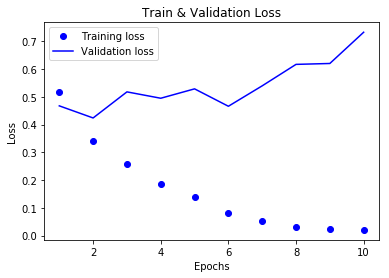

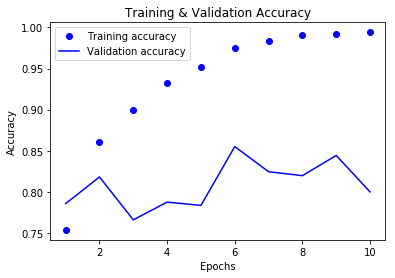

In [8]:
draw(history=history)

验证集上准确率最高达到85%左右。

## LSTM

In [9]:
model = models.Sequential()
model.add(layers.Embedding(max_features,32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history_lstm = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.4995 - acc: 0.7604 - val_loss: 0.6423 - val_acc: 0.7278
Epoch 2/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.2954 - acc: 0.8840 - val_loss: 0.2866 - val_acc: 0.8804
Epoch 3/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.2323 - acc: 0.9125 - val_loss: 0.3355 - val_acc: 0.8552
Epoch 4/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.1987 - acc: 0.9269 - val_loss: 0.3106 - val_acc: 0.8938
Epoch 5/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.1747 - acc: 0.9383 - val_loss: 0.3410 - val_acc: 0.8512
Epoch 6/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.1595 - acc: 0.9418 - val_loss: 0.4008 - val_acc: 0.8402
Epoch 7/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.1474 - acc: 0.9479 - val_loss: 0.3485 - val_acc:

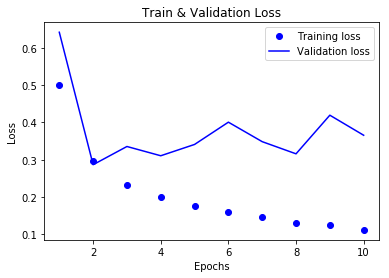

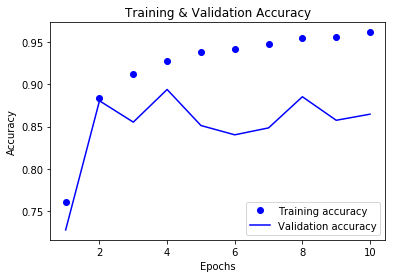

In [11]:
draw(history_lstm)

最高达到88%左右